Sistema de crédito para emprenstimos
Objetivo: Apartir da análise de um score e do histórico de pagamento da pessoa, definir o quanto % da parcela do salário dela pode-se oferecer para o empréstimo. 

Inicialmente definimos os intervalos das variáveis, sendo que:
score (pontuação referente a quantidade de compras), varia de 0 a 1000
histórico de pagamentos (saldo negativo ou positivo), varia de de -5000 a 5000
e por fim, a saída, emprestimo (porcentagem da parcela do emprestimo oferecida pelo banco em cima do rendimento mensal da pessoa), que varia de 0 a 40%. 

Em seguida, são definidas funções de pertinência triângulares referentes ao intervalo de pertinência das funções. Foi definido que teremos 3 variantes para cada uma das 3 variáveis, assim, as variáveis estão sendo classíficadas em Low, Medium e High. 
Para a variável Score, o campo Low, é definido no intervalo decrescente, de 0 a 500, Medium em um intervalo crescente de 0 a 500, e High em um intervalo crecente de 500 a 1000.
Para o histórico, o Low foi definido no intervalo decrescente, de -5000 a 0, Medium em um intervalo crecente de -5000 a 0, e High definido em um intervalo crecente, de 0 a 5000. 
Para emprestimo, foi definido como Low, um intervalo decrescente de 0 a 20, Medium em um intervalo crecente de 0 a 20, e High definido em um intevalo crescente, de 20 a 40.
Em seguida um plot é feito para visualização dos dados.

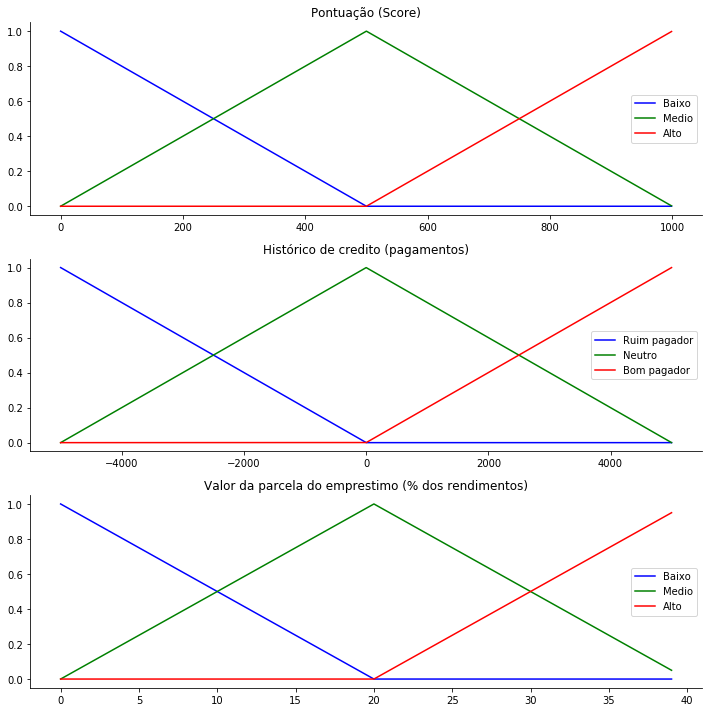

In [9]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

x_score = np.arange(0, 1000, 1) #pontuação referente a quantidade de compras
x_historico = np.arange(-5000, 5000, 1) #saldo(R$) negativo ou positivo - se a pessoa está devendo ou não
x_emprestimo  = np.arange(0, 40, 1) #porcentagem da parcela do emprestimo oferecida pelo banco
#(valor entre 0% a 40% do rendimento mensal da pessoa)

#---------------------------------------------------------------

score_low = fuzz.trimf(x_score, [0, 0, 500])
score_med = fuzz.trimf(x_score, [0, 500, 1000])
score_hig = fuzz.trimf(x_score, [500, 1000, 1000])

historic_low = fuzz.trimf(x_historico, [-5000 , -5000, 0])
historic_med = fuzz.trimf(x_historico, [-5000, 0, 5000])
historic_hig = fuzz.trimf(x_historico, [0, 5000, 5000])

emprestimo_low = fuzz.trimf(x_emprestimo, [0, 0, 20])
emprestimo_med = fuzz.trimf(x_emprestimo, [0, 20, 40])
emprestimo_hig = fuzz.trimf(x_emprestimo, [20, 40, 40])

fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(10, 10))

ax0.plot(x_score, score_low, 'b', linewidth=1.5, label='Baixo')
ax0.plot(x_score, score_med, 'g', linewidth=1.5, label='Medio')
ax0.plot(x_score, score_hig, 'r', linewidth=1.5, label='Alto')
ax0.set_title('Pontuação (Score)')
ax0.legend()


ax1.plot(x_historico, historic_low, 'b', linewidth=1.5, label='Ruim pagador')
ax1.plot(x_historico, historic_med, 'g', linewidth=1.5, label='Neutro')
ax1.plot(x_historico, historic_hig, 'r', linewidth=1.5, label='Bom pagador')
ax1.set_title('Histórico de credito (pagamentos)')
ax1.legend()


ax2.plot(x_emprestimo, emprestimo_low, 'b', linewidth=1.5, label='Baixo')
ax2.plot(x_emprestimo, emprestimo_med, 'g', linewidth=1.5, label='Medio')
ax2.plot(x_emprestimo, emprestimo_hig, 'r', linewidth=1.5, label='Alto')
ax2.set_title('Valor da parcela do emprestimo (% dos rendimentos)')
ax2.legend()

for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
plt.tight_layout()
plt.show()

Terminado as definições das variáveis, começamos a fuzzificação apartir da entrada das variáveis 'user_score' e 'user_hist', referentes ao score e ao histórico do usuário a ser analisado.

Após, temos a definição das regras, do tipo SE ENTÃO que serão aplicadas. São 9 regras dadas da seguinte forma: 
1- SE  SCORE_LOW  E  HISTORIC_LOW     ENTÃO  EMPREST_LOW
2- SE  SCORE_LOW  E  HISTORIC_MEDIUM  ENTÃO  EMPREST_LOW
3- SE  SCORE_LOW  E  HISTORIC_HIGH    ENTÃO  EMPREST_MED
4- SE  SCORE_MED  E  HISTORIC_LOW     ENTÃO  EMPREST_MED
5- SE  SCORE_MED  E  HISTORIC_MED     ENTÃO  EMPREST_MED
6- SE  SCORE_MED  E  HISTORIC_HIGH    ENTÃO  EMPREST_HIGH
7- SE  SCORE_HIGH E  HISTORIC_LOW     ENTÃO  EMPREST_MED
8- SE  SCORE_HIGH E  HISTORIC_MED     ENTÃO  EMPREST_HIGH
9- SE  SCORE_HIGH E  HISTORIC_HIGH    ENTÃO  EMPREST_HIGH

Assim, as regras que têm como saída 'EMPREST_LOW' são as regras: 1 e 2, 'EMPREST_MEDIUM' as regras 3, 4, 5 e 7, e 'EMPREST_HIGH',  as regras 6, 7 e 8. Em seguida, calculamos o Max dessas funções para cada variável de saída e efetuamos o corte, calculando o Min, nas funções de pertinência definidas anteriormente. 


rules: 0.0 0.0 0.0 0.0 0.2 0.8 0.0 0.0 0.0
emp_low: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


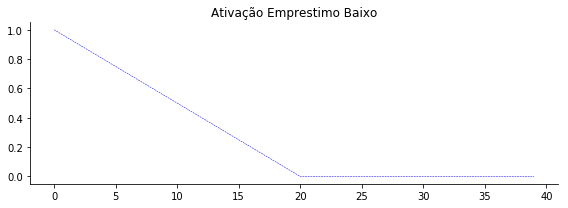

In [29]:
user_score = 500 # 1 a 999
user_hist = 4000  # -4999 a 4999

#interpolação
score_level_lo = fuzz.interp_membership(x_score, score_low, user_score)
score_level_md = fuzz.interp_membership(x_score, score_med, user_score)
score_level_hi = fuzz.interp_membership(x_score, score_hig, user_score)

hist_level_lo = fuzz.interp_membership(x_historico, historic_low, user_hist)
hist_level_md = fuzz.interp_membership(x_historico, historic_med, user_hist)
hist_level_hi = fuzz.interp_membership(x_historico, historic_hig, user_hist)

rule1 = np.fmin(score_level_lo,hist_level_lo)
rule2 = np.fmin(score_level_lo,hist_level_md)
rule3 = np.fmin(score_level_lo,hist_level_hi)
rule4 = np.fmin(score_level_md,hist_level_lo)
rule5 = np.fmin(score_level_md,hist_level_md)
rule6 = np.fmin(score_level_md,hist_level_hi)
rule7 = np.fmin(score_level_hi,hist_level_lo)
rule8 = np.fmin(score_level_hi,hist_level_md)
rule9 = np.fmin(score_level_hi,hist_level_hi)

print("rules:",rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9)

activate_emprest_low = np.fmin (np.fmax(rule1,rule2),emprestimo_low)
activate_emprest_med = np.fmin (np.fmax(rule3,np.fmax(rule4,np.fmax(rule5,rule7))),emprestimo_med)
activate_emprest_hig = np.fmin (np.fmax(rule6,np.fmax(rule8,rule9)),emprestimo_hig)
#maiores valores dos 

emp0 = np.zeros_like(x_emprestimo)
#print("emp0:",emp0)

print("emp_low:",activate_emprest_low)
#plot
fig2,ax3 = plt.subplots( figsize = ( 8 , 3 ))

ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_low , facecolor = 'b' , alpha = 0.7 )
ax3.plot ( x_emprestimo , emprestimo_low , 'b' , linewidth = 0.5 , linestyle = '--' , )
#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_med , facecolor = 'g' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_med , 'g' , linewidth = 0.5 , linestyle = '--' )
#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_hig , facecolor = 'r' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_hig , 'r' , linewidth = 0.5 , linestyle = '--' )
ax3.set_title ( 'Ativação Emprestimo Baixo' )

# Turn off top/right axes
for ax in (ax3, ):
    ax.spines [ 'top' ] .  set_visible ( False )
    ax.spines [ 'right' ] .  set_visible ( False )
    ax.get_xaxis () .  tick_bottom ()
    ax.get_yaxis () .  tick_left ()

plt .  tight_layout ()
plt.show()



emp_med: [0.   0.05 0.1  0.15 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2
 0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.2  0.15 0.1  0.05]


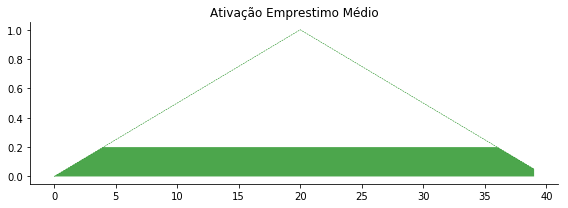

In [30]:
print("emp_med:",activate_emprest_med)
#plot
fig2,ax3 = plt.subplots( figsize = ( 8 , 3 ))

#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_low , facecolor = 'b' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_low , 'b' , linewidth = 0.5 , linestyle = '--' , )
ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_med , facecolor = 'g' , alpha = 0.7 )
ax3.plot ( x_emprestimo , emprestimo_med , 'g' , linewidth = 0.5 , linestyle = '--' )
#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_hig , facecolor = 'r' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_hig , 'r' , linewidth = 0.5 , linestyle = '--' )
ax3.set_title ( 'Ativação Emprestimo Médio' )

# Turn off top/right axes
for ax in (ax3, ):
    ax.spines [ 'top' ] .  set_visible ( False )
    ax.spines [ 'right' ] .  set_visible ( False )
    ax.get_xaxis () .  tick_bottom ()
    ax.get_yaxis () .  tick_left ()

plt .  tight_layout ()
plt.show()

emp_hig: [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35
 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.8  0.8  0.8 ]


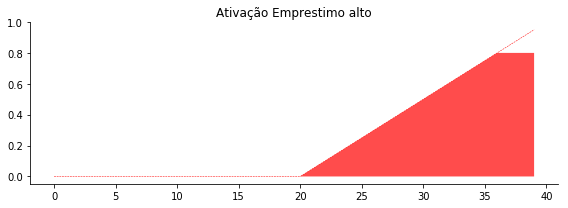

In [31]:
print("emp_hig:",activate_emprest_hig)
#plot
fig2,ax3 = plt.subplots( figsize = ( 8 , 3 ))

#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_low , facecolor = 'b' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_low , 'b' , linewidth = 0.5 , linestyle = '--' , )
#ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_med , facecolor = 'g' , alpha = 0.7 )
#ax3.plot ( x_emprestimo , emprestimo_med , 'g' , linewidth = 0.5 , linestyle = '--' )
ax3.fill_between ( x_emprestimo , emp0 , activate_emprest_hig , facecolor = 'r' , alpha = 0.7 )
ax3.plot ( x_emprestimo , emprestimo_hig , 'r' , linewidth = 0.5 , linestyle = '--' )
ax3.set_title ( 'Ativação Emprestimo alto' )

# Turn off top/right axes
for ax in (ax3, ):
    ax.spines [ 'top' ] .  set_visible ( False )
    ax.spines [ 'right' ] .  set_visible ( False )
    ax.get_xaxis () .  tick_bottom ()
    ax.get_yaxis () .  tick_left ()

plt .  tight_layout ()
plt.show()

Assim, após a Fuzzificação, e a inferencia, realizamos a defuzzificação pelo primeiro máximo, obtendo a saída "emprest" desejada

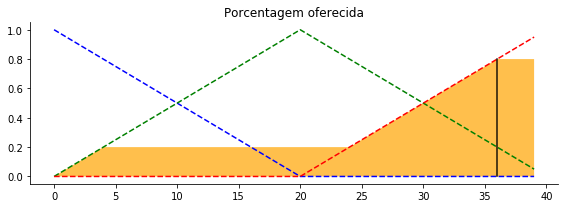

emprest: 36 %


In [32]:
agregado = np.fmax(activate_emprest_hig,np.fmax(activate_emprest_med,activate_emprest_low))
emprest = fuzz.defuzz(x_emprestimo,agregado,'som')
emprest_activate = fuzz.interp_membership(x_emprestimo,agregado,emprest)


fig,ax0 = plt.subplots(figsize = ( 8 , 3 ))


ax0.plot(x_emprestimo, emprestimo_low, 'b', linewidth=1.5,linestyle = '--')
ax0.plot(x_emprestimo, emprestimo_med, 'g', linewidth=1.5, linestyle = '--' )
ax0.plot(x_emprestimo, emprestimo_hig, 'r', linewidth=1.5, linestyle = '--' )
ax0.set_title('Porcentagem oferecida')
ax0.fill_between( x_emprestimo , emp0 , agregado , facecolor = 'Orange' , alpha = 0.7 )
ax0.plot([ emprest , emprest ], [ 0 , emprest_activate ], 'k' , linewidth = 1.5 , alpha = 0.9 )


# Turn off top/right axes
for ax in ( ax0 ,):
    ax.spines[ 'top' ].set_visible ( False )
    ax.spines[ 'right' ].set_visible ( False )
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout ()
plt.show()
print("emprest:",emprest,"%")